In [202]:
from __future__ import print_function
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
#import seaborn as sns
from scipy import stats
from IPython.display import display, HTML

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing

import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape, LSTM
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

In [429]:
subjects=pd.read_csv("subjects.csv")

In [430]:
subjects.shape

(1215745, 27)

In [431]:
subjects=subjects[subjects['Label (0 for the null class)']!=0]

In [432]:
subjects.shape

(343195, 27)

In [433]:
#subjects.drop(columns=['Unnamed: 0', 'index'],inplace=True)
subjects.reset_index(inplace=True)

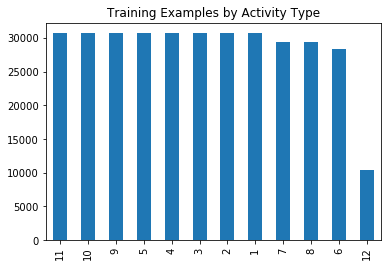

In [434]:
subjects['Label (0 for the null class)'].value_counts().plot(kind='bar',
                                   title='Training Examples by Activity Type')
plt.show()

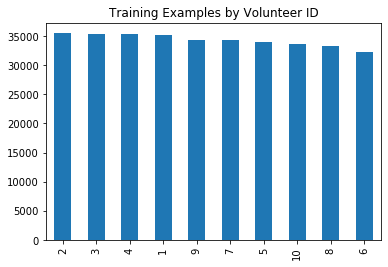

In [716]:
subjects['subject_number'].value_counts().plot(kind='bar',
                                   title='Training Examples by Volunteer ID')
plt.show()

In [435]:
subjects.drop(columns=['level_0','index'],inplace=True)


In [436]:
subjects.reset_index(inplace=True)

In [437]:
subjects.drop(columns=['Unnamed: 0'],inplace=True)

In [225]:
subjects.head()

,index,subject_number,acceleration from the chest sensor (X axis),acceleration from the chest sensor (Y axis),acceleration from the chest sensor (Z axis),electrocardiogram signal (lead 1),electrocardiogram signal (lead 2),acceleration from the left-ankle sensor (X axis),acceleration from the left-ankle sensor (Y axis),acceleration from the left-ankle sensor (Z axis),...,acceleration from the right-lower-arm sensor (X axis),acceleration from the right-lower-arm sensor (Y axis),acceleration from the right-lower-arm sensor (Z axis),gyro from the right-lower-arm sensor (X axis),gyro from the right-lower-arm sensor (Y axis),gyro from the right-lower-arm sensor (Z axis),magnetometer from the right-lower-arm sensor (X axis),magnetometer from the right-lower-arm sensor (Y axis),magnetometer from the right-lower-arm sensor (Z axis),Label (0 for the null class)
0,0,1,-9.7788,0.55690,1.19750,0.008373,-0.033490,2.6493,-9.4517,0.37683,...,-2.8439,-9.0618,1.8177,-0.058824,-0.93429,-0.34483,0.355370,-0.37003,-0.35020,1
1,1,1,-9.7733,0.27880,0.73036,-0.025118,-0.025118,2.4157,-9.5306,0.40179,...,-2.9935,-9.2048,1.5189,-0.058824,-0.93429,-0.34483,0.719910,0.17803,0.37363,1
2,2,1,-9.8609,0.11561,0.79988,0.025118,0.016745,2.3865,-9.5991,0.48141,...,-2.8846,-9.1945,1.5507,-0.058824,-0.93429,-0.34483,0.355370,-0.37003,-0.35020,1
3,3,1,-9.7409,0.17652,0.88957,0.180010,0.129770,2.3758,-9.5997,0.42919,...,-2.9245,-9.1746,1.5413,-0.078431,-0.93429,-0.34052,0.357180,-0.18858,-0.35198,1
4,4,1,-9.7821,0.21637,0.90368,0.092098,0.046049,2.3239,-9.5406,0.40038,...,-2.8963,-9.2039,1.6127,-0.078431,-0.93429,-0.34052,-0.001887,-0.18867,-0.72017,1


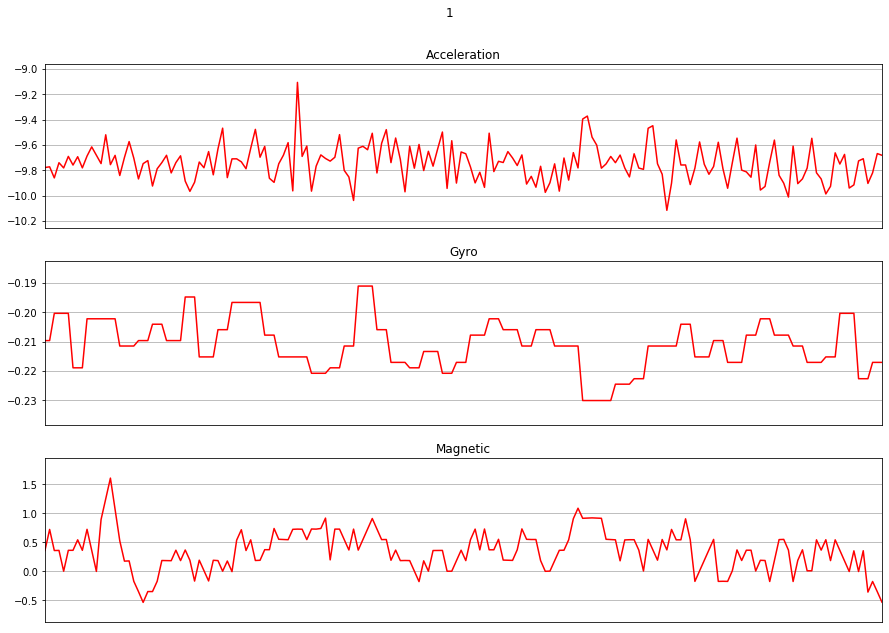

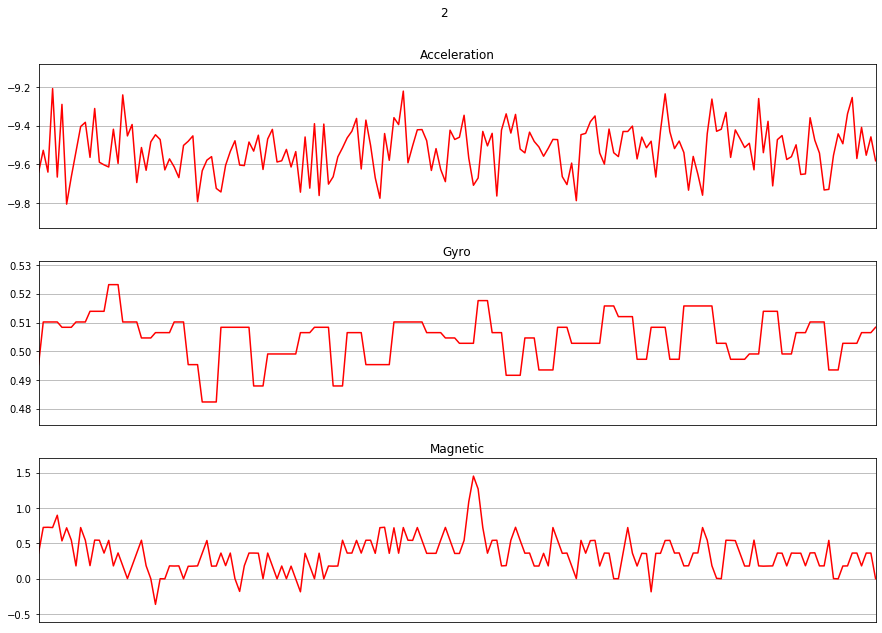

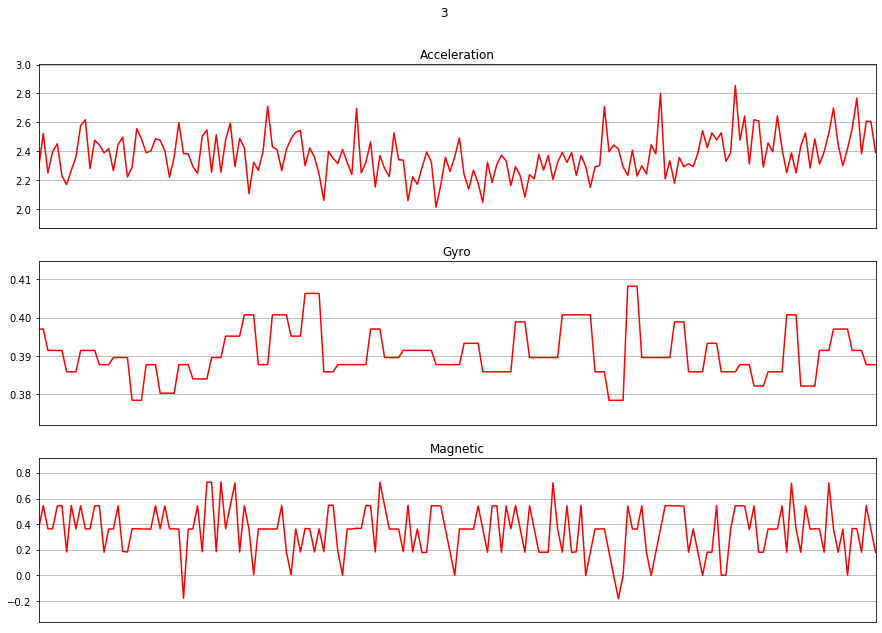

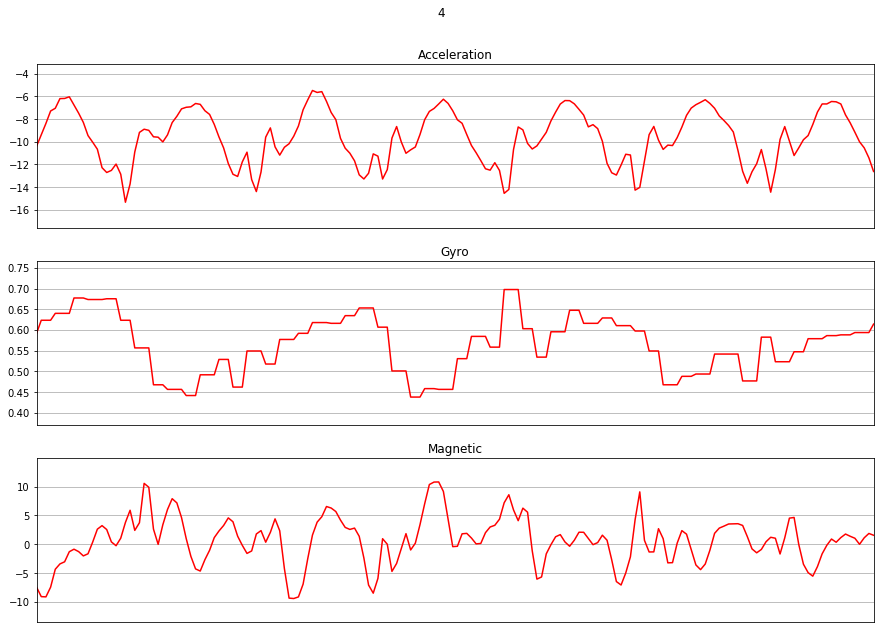

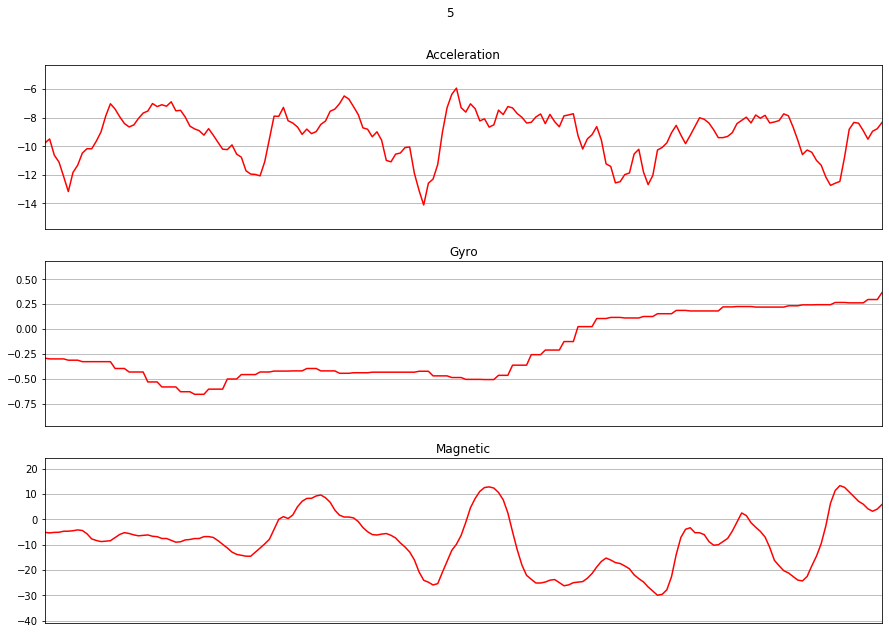

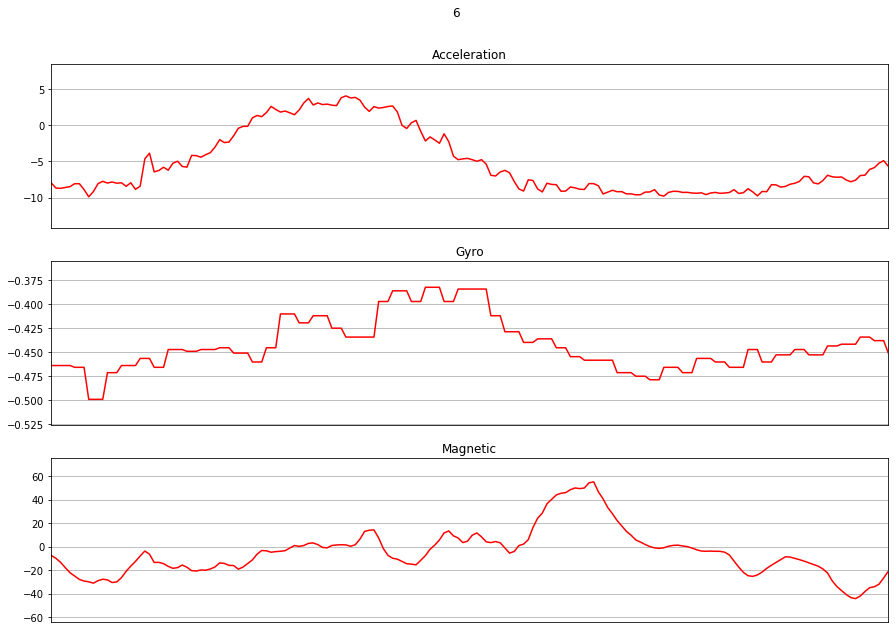

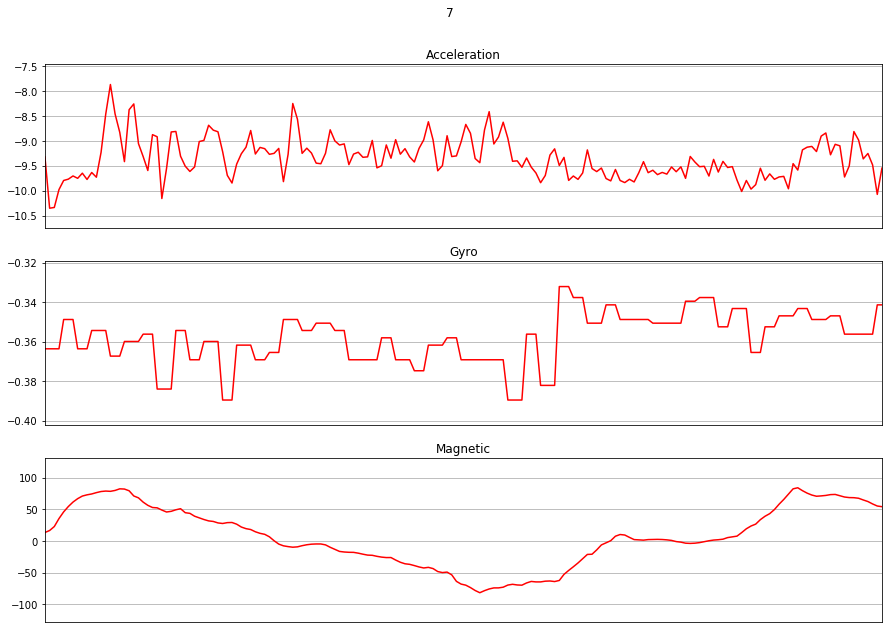

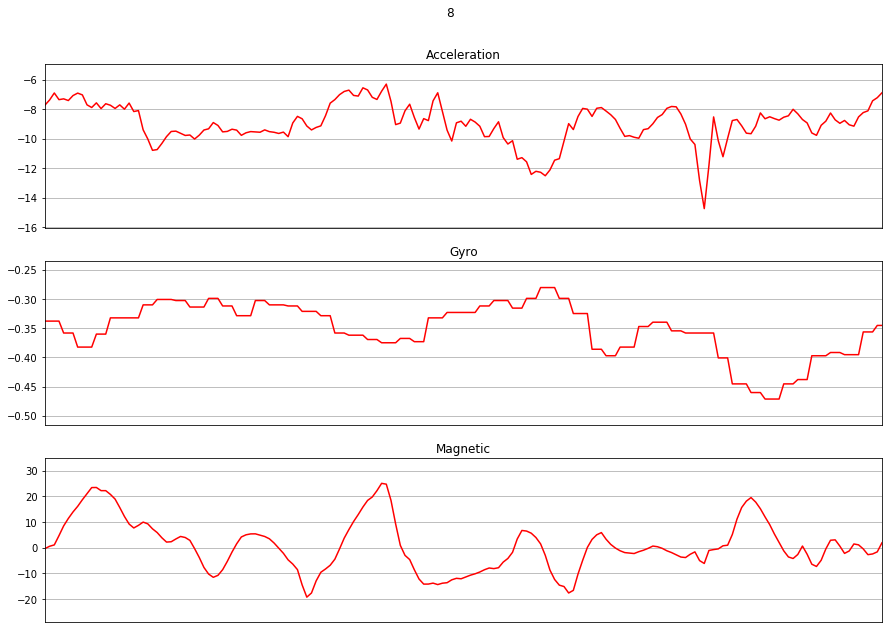

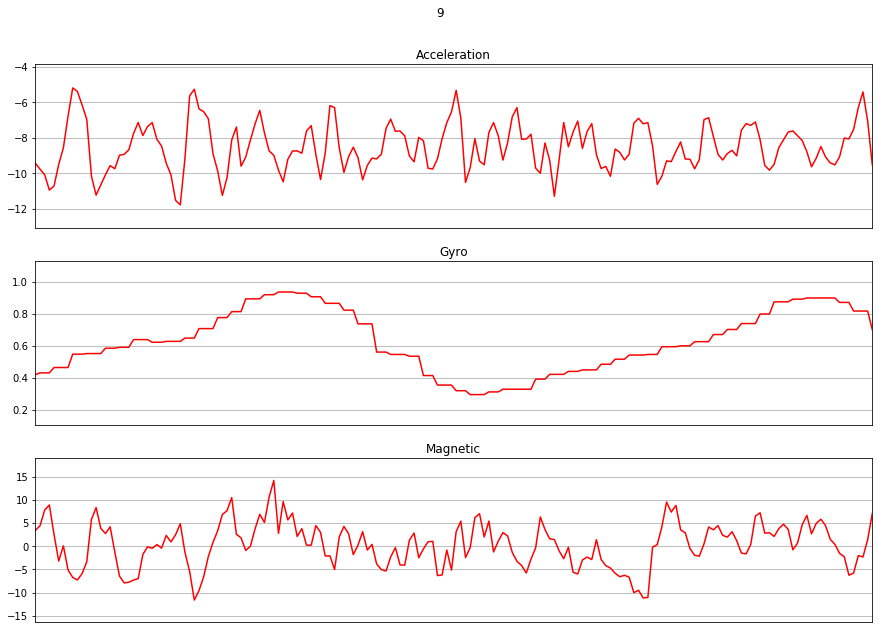

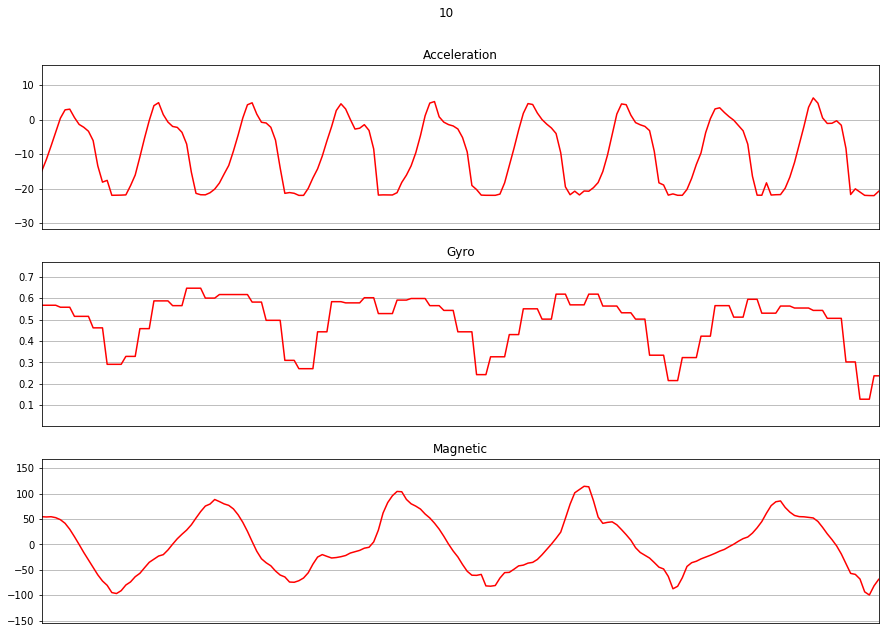

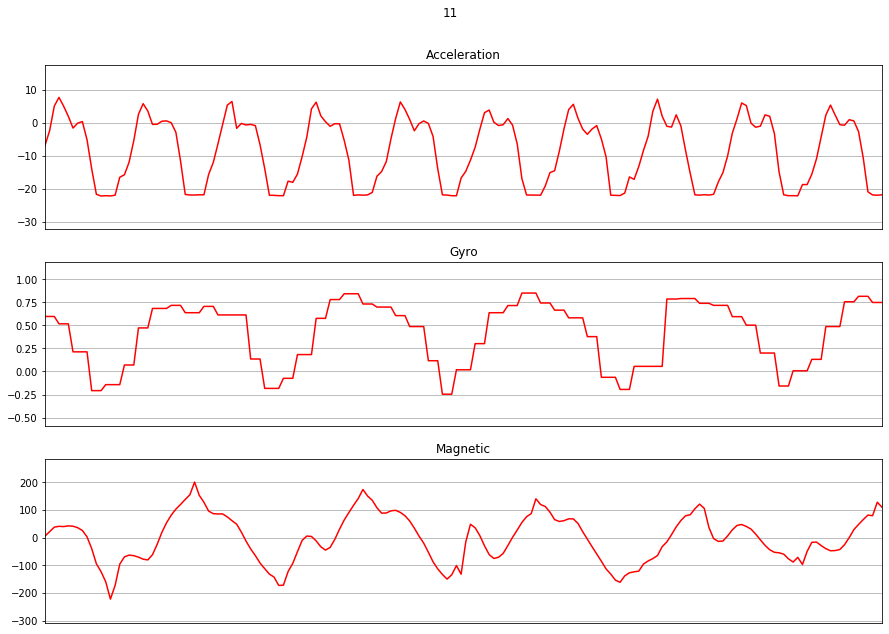

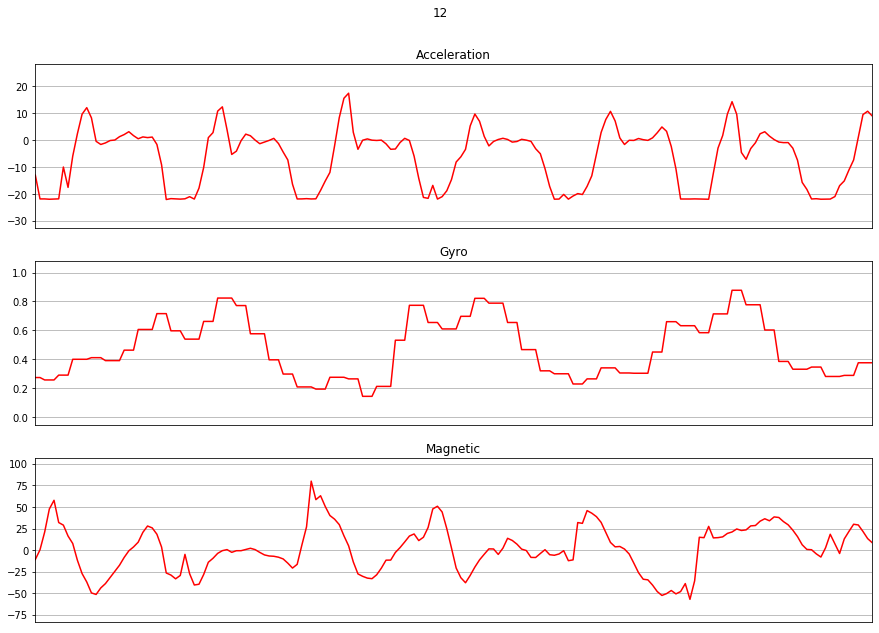

In [59]:
def plot_activity(activity, data):

    fig, (ax0, ax1, ax2) = plt.subplots(nrows=3,
         figsize=(15, 10),
         sharex=False)
    plot_axis(ax0, data['index'], data['acceleration from the chest sensor (X axis)'], 'Acceleration')
    plot_axis(ax1, data['index'], data['gyro from the left-ankle sensor (X axis)'], 'Gyro')
    plot_axis(ax2, data['index'], data['magnetometer from the right-lower-arm sensor (X axis)'], 'Magnetic')
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(activity)
    plt.subplots_adjust(top=0.90)
    plt.show()

def plot_axis(ax, x, y, title):

    ax.plot(x, y, 'r')
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)

for label in np.unique(subjects['Label (0 for the null class)']):
    subset = subjects[subjects['Label (0 for the null class)'] == label][:180]
    plot_activity(label, subset)

In [438]:
subjects.head()

,index,subject_number,acceleration from the chest sensor (X axis),acceleration from the chest sensor (Y axis),acceleration from the chest sensor (Z axis),electrocardiogram signal (lead 1),electrocardiogram signal (lead 2),acceleration from the left-ankle sensor (X axis),acceleration from the left-ankle sensor (Y axis),acceleration from the left-ankle sensor (Z axis),...,acceleration from the right-lower-arm sensor (X axis),acceleration from the right-lower-arm sensor (Y axis),acceleration from the right-lower-arm sensor (Z axis),gyro from the right-lower-arm sensor (X axis),gyro from the right-lower-arm sensor (Y axis),gyro from the right-lower-arm sensor (Z axis),magnetometer from the right-lower-arm sensor (X axis),magnetometer from the right-lower-arm sensor (Y axis),magnetometer from the right-lower-arm sensor (Z axis),Label (0 for the null class)
0,0,1,-9.7788,0.55690,1.19750,0.008373,-0.033490,2.6493,-9.4517,0.37683,...,-2.8439,-9.0618,1.8177,-0.058824,-0.93429,-0.34483,0.355370,-0.37003,-0.35020,1
1,1,1,-9.7733,0.27880,0.73036,-0.025118,-0.025118,2.4157,-9.5306,0.40179,...,-2.9935,-9.2048,1.5189,-0.058824,-0.93429,-0.34483,0.719910,0.17803,0.37363,1
2,2,1,-9.8609,0.11561,0.79988,0.025118,0.016745,2.3865,-9.5991,0.48141,...,-2.8846,-9.1945,1.5507,-0.058824,-0.93429,-0.34483,0.355370,-0.37003,-0.35020,1
3,3,1,-9.7409,0.17652,0.88957,0.180010,0.129770,2.3758,-9.5997,0.42919,...,-2.9245,-9.1746,1.5413,-0.078431,-0.93429,-0.34052,0.357180,-0.18858,-0.35198,1
4,4,1,-9.7821,0.21637,0.90368,0.092098,0.046049,2.3239,-9.5406,0.40038,...,-2.8963,-9.2039,1.6127,-0.078431,-0.93429,-0.34052,-0.001887,-0.18867,-0.72017,1


In [439]:
subjects.shape

(343195, 26)

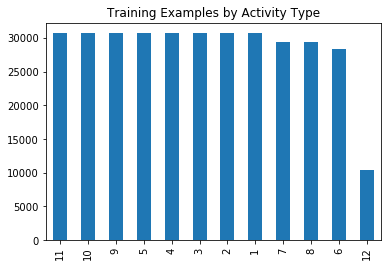

In [440]:
subjects['Label (0 for the null class)'].value_counts().plot(kind='bar',
                                   title='Training Examples by Activity Type')
plt.show()

In [441]:
subjects.drop(columns='index',inplace=True)

In [442]:
subjects.head()

,subject_number,acceleration from the chest sensor (X axis),acceleration from the chest sensor (Y axis),acceleration from the chest sensor (Z axis),electrocardiogram signal (lead 1),electrocardiogram signal (lead 2),acceleration from the left-ankle sensor (X axis),acceleration from the left-ankle sensor (Y axis),acceleration from the left-ankle sensor (Z axis),gyro from the left-ankle sensor (X axis),...,acceleration from the right-lower-arm sensor (X axis),acceleration from the right-lower-arm sensor (Y axis),acceleration from the right-lower-arm sensor (Z axis),gyro from the right-lower-arm sensor (X axis),gyro from the right-lower-arm sensor (Y axis),gyro from the right-lower-arm sensor (Z axis),magnetometer from the right-lower-arm sensor (X axis),magnetometer from the right-lower-arm sensor (Y axis),magnetometer from the right-lower-arm sensor (Z axis),Label (0 for the null class)
0,1,-9.7788,0.55690,1.19750,0.008373,-0.033490,2.6493,-9.4517,0.37683,-0.20965,...,-2.8439,-9.0618,1.8177,-0.058824,-0.93429,-0.34483,0.355370,-0.37003,-0.35020,1
1,1,-9.7733,0.27880,0.73036,-0.025118,-0.025118,2.4157,-9.5306,0.40179,-0.20965,...,-2.9935,-9.2048,1.5189,-0.058824,-0.93429,-0.34483,0.719910,0.17803,0.37363,1
2,1,-9.8609,0.11561,0.79988,0.025118,0.016745,2.3865,-9.5991,0.48141,-0.20037,...,-2.8846,-9.1945,1.5507,-0.058824,-0.93429,-0.34483,0.355370,-0.37003,-0.35020,1
3,1,-9.7409,0.17652,0.88957,0.180010,0.129770,2.3758,-9.5997,0.42919,-0.20037,...,-2.9245,-9.1746,1.5413,-0.078431,-0.93429,-0.34052,0.357180,-0.18858,-0.35198,1
4,1,-9.7821,0.21637,0.90368,0.092098,0.046049,2.3239,-9.5406,0.40038,-0.20037,...,-2.8963,-9.2039,1.6127,-0.078431,-0.93429,-0.34052,-0.001887,-0.18867,-0.72017,1


In [719]:
df_train=subjects[(subjects['subject_number']!=10)].drop(columns=['subject_number','electrocardiogram signal (lead 1)','electrocardiogram signal (lead 2)'])

df_test=subjects[(subjects['subject_number']==10)].drop(columns=['subject_number','electrocardiogram signal (lead 1)','electrocardiogram signal (lead 2)'])

In [720]:
df_train.shape

(309505, 22)

In [721]:
# Normalize features for training data set (values between 0 and 1)
# Surpress warning for next 3 operation
pd.options.mode.chained_assignment = None  # default='warn'

for i in range(0,21):
    df_train[df_train.columns[i]] = df_train[df_train.columns[i]] / df_train[df_train.columns[i]].max()

# Round numbers
#X_train = df_train.round({'x-axis': 4, 'y-axis': 4, 'z-axis': 4})

In [722]:
for i in range(0,21):
    df_test[df_test.columns[i]] = df_test[df_test.columns[i]] / df_test[df_test.columns[i]].max()


In [723]:
TIME_PERIODS = 100
# The steps to take from one segment to the next; if this value is equal to
# TIME_PERIODS, then there is no overlap between the segments
STEP_DISTANCE = 2

def create_segments_and_labels(df, time_steps, step, label_name):

    # x, y, z acceleration as features
    N_FEATURES = 21
    # Number of steps to advance in each iteration (for me, it should always
    # be equal to the time_steps in order to have no overlap between segments)
    # step = time_steps
    segments = []
    labels = []
    for i in range(0, len(df) - time_steps, step):
        xs1 = df['acceleration from the chest sensor (X axis)'].values[i: i + time_steps]
        ys1 = df['acceleration from the chest sensor (Y axis)'].values[i: i + time_steps]
        zs1 = df['acceleration from the chest sensor (Z axis)'].values[i: i + time_steps]
        xs2 = df['acceleration from the left-ankle sensor (X axis)'].values[i: i + time_steps]
        ys2 = df['acceleration from the left-ankle sensor (Y axis)'].values[i: i + time_steps]
        zs2 = df['acceleration from the left-ankle sensor (Z axis)'].values[i: i + time_steps]
        xs3 = df['gyro from the left-ankle sensor (X axis)'].values[i: i + time_steps]
        ys3 = df['gyro from the left-ankle sensor (Y axis)'].values[i: i + time_steps]
        zs3 = df['gyro from the left-ankle sensor (Z axis)'].values[i: i + time_steps]
        xs4 = df['magnetometer from the left-ankle sensor (X axis)'].values[i: i + time_steps]
        ys4 = df['magnetometer from the left-ankle sensor (Y axis)'].values[i: i + time_steps]
        zs4 = df['magnetometer from the left-ankle sensor (Z axis)'].values[i: i + time_steps]
        xs5 = df['acceleration from the right-lower-arm sensor (X axis)'].values[i: i + time_steps]
        ys5 = df['acceleration from the right-lower-arm sensor (Y axis)'].values[i: i + time_steps]
        zs5 = df['acceleration from the right-lower-arm sensor (Z axis)'].values[i: i + time_steps]        
        xs6 = df['gyro from the right-lower-arm sensor (X axis)'].values[i: i + time_steps]
        ys6 = df['gyro from the right-lower-arm sensor (Y axis)'].values[i: i + time_steps]
        zs6 = df['gyro from the right-lower-arm sensor (Z axis)'].values[i: i + time_steps]        
        xs7 = df['magnetometer from the right-lower-arm sensor (X axis)'].values[i: i + time_steps]
        ys7 = df['magnetometer from the right-lower-arm sensor (Y axis)'].values[i: i + time_steps]
        zs7 = df['magnetometer from the right-lower-arm sensor (Z axis)'].values[i: i + time_steps]            
        
        # Retrieve the most often used label in this segment
        label = stats.mode(df[label_name][i: i + time_steps])[0][0]
        segments.append([xs1, ys1, zs1, xs2, ys2, zs2, xs3, ys3, zs3, xs4, ys4, zs4, xs5, ys5, zs5, xs6, ys6, zs6, xs7, ys7, zs7])
        labels.append(label)

    # Bring the segments into a better shape
    reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, time_steps, N_FEATURES)
    labels = np.asarray(labels)

    return reshaped_segments, labels

x_train, y_train = create_segments_and_labels(df_train,
                                              TIME_PERIODS,
                                              STEP_DISTANCE,
                                              "Label (0 for the null class)")

In [738]:
print('x_train shape: ', x_train.shape)
print(x_train.shape[0], 'training samples')
print('y_train shape: ', y_train.shape)

x_train shape:  (154703, 2100)
154703 training samples
y_train shape:  (154703,)


In [725]:
num_time_periods, num_sensors = x_train.shape[1], x_train.shape[2]
num_classes = 12


In [726]:
input_shape = (num_time_periods*num_sensors)
x_train = x_train.reshape(x_train.shape[0], input_shape)
print('x_train shape:', x_train.shape)
print('input_shape:', input_shape)

x_train shape: (154703, 2100)
input_shape: 2100


In [727]:
x_train = x_train.astype('float32')
y_train = y_train.astype('float32')

In [728]:
y_train

array([1., 1., 1., ..., 5., 5., 5.], dtype=float32)

In [729]:
y_train_hot = np_utils.to_categorical(y_train, 13)
print('New y_train shape: ', y_train_hot.shape)

New y_train shape:  (154703, 13)


In [730]:
y_train_hot = y_train_hot[:,1:]

In [731]:
y_train_hot

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [732]:
y_train_hot.shape

(154703, 12)

In [733]:
model_m = Sequential()
# Remark: since coreml cannot accept vector shapes of complex shape like
# [80,3] this workaround is used in order to reshape the vector internally
# prior feeding it into the network
model_m.add(Reshape((100, 21), input_shape=(2100,)))
model_m.add(Dense(300, activation='relu'))
model_m.add(Dense(100, activation='relu'))
model_m.add(Dense(100, activation='relu'))
model_m.add(Dense(30, activation='relu'))


model_m.add(Flatten())
model_m.add(Dense(num_classes, activation='softmax'))


In [734]:
model_m.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_9 (Reshape)          (None, 100, 21)           0         
_________________________________________________________________
dense_69 (Dense)             (None, 100, 300)          6600      
_________________________________________________________________
dense_70 (Dense)             (None, 100, 100)          30100     
_________________________________________________________________
dense_71 (Dense)             (None, 100, 100)          10100     
_________________________________________________________________
dense_72 (Dense)             (None, 100, 30)           3030      
_________________________________________________________________
flatten_20 (Flatten)         (None, 3000)              0         
_________________________________________________________________
dense_73 (Dense)             (None, 12)                36012     
Total para

In [486]:
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='best_model.{epoch:02d}-{val_loss:.2f}.h5',
        monitor='val_loss', save_best_only=True),
    keras.callbacks.EarlyStopping(monitor='acc', patience=1)
]

model_m.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
BATCH_SIZE = 100
EPOCHS = 50

# model_m.compile(loss = 'sparse_categorical_crossentropy',optimizer = 'Adam', metrics = ['accuracy'])
# Enable validation to use ModelCheckpoint and EarlyStopping callbacks.
history = model_m.fit(x_train,
                      y_train_hot,
                      batch_size=BATCH_SIZE,
                      epochs=EPOCHS,
                      callbacks=callbacks_list,
                      validation_split=0.2,
                      verbose=1)


Train on 123762 samples, validate on 30941 samples
Epoch 1/50
123762/123762 [==============================] - 113s 914us/step - loss: 0.0649 - acc: 0.9797 - val_loss: 0.3334 - val_acc: 0.9019
Epoch 2/50
123762/123762 [==============================] - 111s 894us/step - loss: 0.0108 - acc: 0.9971 - val_loss: 0.4925 - val_acc: 0.8773
Epoch 3/50
123762/123762 [==============================] - 110s 893us/step - loss: 0.0079 - acc: 0.9980 - val_loss: 0.3750 - val_acc: 0.9109
Epoch 4/50
123762/123762 [==============================] - 109s 879us/step - loss: 0.0061 - acc: 0.9983 - val_loss: 0.3951 - val_acc: 0.9194
Epoch 5/50
123762/123762 [==============================] - 109s 880us/step - loss: 0.0066 - acc: 0.9983 - val_loss: 0.2924 - val_acc: 0.9150
Epoch 6/50
123762/123762 [==============================] - 110s 886us/step - loss: 0.0048 - acc: 0.9987 - val_loss: 0.3214 - val_acc: 0.9278
Epoch 7/50
123762/123762 [==============================] - 143s 1ms/step - loss: 0.0043 - acc: 0

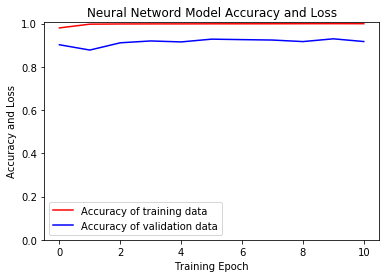

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00     13805
         2.0       1.00      1.00      1.00     13824
         3.0       1.00      1.00      1.00     13824
         4.0       0.91      1.00      0.95     13824
         5.0       0.95      0.90      0.92     13799
         6.0       1.00      1.00      1.00     12929
         7.0       1.00      1.00      1.00     13336
         8.0       0.99      0.95      0.97     13236
         9.0       1.00      0.99      1.00     13824
        10.0       0.97      1.00      0.98     13824
        11.0       1.00      0.97      0.98     13824
        12.0       0.99      1.00      1.00      4654

    accuracy                           0.98    154703
   macro avg       0.98      0.98      0.98    154703
weighted avg       0.98      0.98      0.98    154703



In [610]:
plt.figure(figsize=(6, 4))
plt.plot(history.history['acc'], 'r', label='Accuracy of training data')
plt.plot(history.history['val_acc'], 'b', label='Accuracy of validation data')
# plt.plot(history.history['loss'], 'r--', label='Loss of training data')
# plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
plt.title('Neural Netword Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()

# Print confusion matrix for training data
y_pred_train = model_m.predict(x_train)
# Take the class with the highest probability from the train predictions
max_y_pred_train = np.argmax(y_pred_train, axis=1)+1
print(classification_report(y_train, max_y_pred_train))

In [576]:
# max_y_pred_train+1

In [578]:
_, accuracy = model_m.evaluate(x_test, y_test_hot, batch_size=1)

16795/16795 [==============================] - 31s 2ms/step


In [579]:
accuracy

0.8681750520988389

In [580]:
# Print confusion matrix for testing data
y_pred_test = model_m.predict(x_test)
# Take the class with the highest probability from the train predictions
max_y_pred_test = np.argmax(y_pred_test, axis=1)+1
print(classification_report(y_test, max_y_pred_test))

              precision    recall  f1-score   support

           1       1.00      0.96      0.98      1537
           2       1.00      1.00      1.00      1536
           3       1.00      1.00      1.00      1536
           4       1.00      0.99      1.00      1536
           5       1.00      0.81      0.90      1511
           6       0.46      1.00      0.63      1229
           7       1.00      0.98      0.99      1382
           8       0.07      0.02      0.03      1434
           9       0.99      1.00      1.00      1536
          10       1.00      0.73      0.85      1536
          11       0.98      1.00      0.99      1536
          12       0.56      1.00      0.72       486

    accuracy                           0.87     16795
   macro avg       0.84      0.87      0.84     16795
weighted avg       0.87      0.87      0.85     16795



In [513]:
history.history['val_acc']

[0.9018777679194577,
 0.877347209977582,
 0.9109272490963516,
 0.9194272976987641,
 0.914967196664146,
 0.9277657485152527,
 0.9255680168869096,
 0.9236288428538229,
 0.9165185357762355,
 0.9292847692621155,
 0.9167447726765291]

In [640]:
# serialize model to JSON
model_m_json = model_m.to_json()
with open("basic_neural_network.json", "w") as json_file:
    json_file.write(model_m_json)
# serialize weights to HDF5
model_m.save_weights("basic_neural_network.h5")
print("Saved model to disk")

Saved model to disk


In [677]:
model_m.save('basic_model.h5')

In [684]:
x_test, y_test = create_segments_and_labels(df_test,
                                              100,
                                              2,
                                              "Label (0 for the null class)")
input_shape = (num_time_periods*num_sensors)
x_test = x_test.reshape(x_test.shape[0], input_shape)
print('x_test shape:', x_test.shape)

x_test shape: (16795, 2100)


In [685]:
from tensorflow.keras.models import load_model
basic_model = load_model('basic_model.h5')
_, accuracy = basic_model.evaluate(x_test, y_test_hot, batch_size=1, verbose=0)
accuracy

0.8681750520988389

In [735]:
from tensorflow.keras.models import model_from_json

json_file = open('basic_neural_network.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("basic_neural_network.h5")
print("Loaded model from disk")

Loaded model from disk


In [737]:
# loaded_model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
# _, accuracy = loaded_model.evaluate(x_test, y_test_hot, batch_size=1, verbose=0)
# accuracy

In [515]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D
n_timesteps = 100
n_features = 21
n_outputs = 12

model = Sequential()
model.add(Conv1D(filters=192, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(192, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [700]:
x_train, y_train = create_segments_and_labels(df_train,
                                              100,
                                              2,
                                              "Label (0 for the null class)")

In [709]:
x_test, y_test = create_segments_and_labels(df_test,
                                              100,
                                              2,
                                              "Label (0 for the null class)")

In [710]:
x_train = x_train.astype('float32')
y_train = y_train.astype('float32')

In [711]:
x_test = x_test.astype('float32')
y_test = y_test.astype('float32')

In [704]:
input_shape = (num_time_periods*num_sensors)
x_test = x_test.reshape(x_test.shape[0], input_shape)
print('x_test shape:', x_test.shape)

x_test shape: (16795, 2100)


In [712]:
y_train_hot = np_utils.to_categorical(y_train, 13)
print('New y_train shape: ', y_train_hot.shape)

y_test_hot = np_utils.to_categorical(y_test, 13)
print('New y_test shape: ', y_test_hot.shape)

New y_train shape:  (154703, 13)
New y_test shape:  (16795, 13)


In [713]:
y_train_hot = y_train_hot[:,1:]
y_test_hot = y_test_hot[:,1:]

In [521]:
model.fit(x_train, y_train_hot, epochs=10,batch_size=32,verbose=0)
_, accuracy = model.evaluate(x_test, y_test_hot, batch_size=32, verbose=0)

In [522]:
accuracy

0.893896993152724

In [523]:
_

1.5128388590064499

In [707]:
# Print confusion matrix for training data
y_pred_train = model.predict(x_train)
# Take the class with the highest probability from the train predictions
max_y_pred_train = np.argmax(y_pred_train, axis=1)+1
print(classification_report(y_train, max_y_pred_train))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00     13805
         2.0       1.00      1.00      1.00     13824
         3.0       1.00      1.00      1.00     13824
         4.0       1.00      1.00      1.00     13824
         5.0       1.00      1.00      1.00     13799
         6.0       1.00      1.00      1.00     12929
         7.0       1.00      1.00      1.00     13336
         8.0       1.00      1.00      1.00     13236
         9.0       1.00      1.00      1.00     13824
        10.0       1.00      1.00      1.00     13824
        11.0       1.00      1.00      1.00     13824
        12.0       1.00      1.00      1.00      4654

    accuracy                           1.00    154703
   macro avg       1.00      1.00      1.00    154703
weighted avg       1.00      1.00      1.00    154703



In [714]:
# Print confusion matrix for test data
y_pred_test = model.predict(x_test)
# Take the class with the highest probability from the train predictions
max_y_pred_test = np.argmax(y_pred_test, axis=1)+1
print(classification_report(y_test, max_y_pred_test))

              precision    recall  f1-score   support

         1.0       1.00      0.99      0.99      1537
         2.0       1.00      0.98      0.99      1536
         3.0       0.99      1.00      1.00      1536
         4.0       1.00      0.92      0.96      1536
         5.0       0.91      0.85      0.88      1511
         6.0       0.47      1.00      0.64      1229
         7.0       1.00      0.99      1.00      1382
         8.0       0.21      0.04      0.07      1434
         9.0       0.98      1.00      0.99      1536
        10.0       1.00      1.00      1.00      1536
        11.0       0.99      1.00      1.00      1536
        12.0       1.00      0.99      1.00       486

    accuracy                           0.89     16795
   macro avg       0.88      0.90      0.88     16795
weighted avg       0.88      0.89      0.88     16795



In [618]:
model.history.history

{'loss': [0.04390530345545796,
  0.017050384027917434,
  0.013936379589480604,
  0.009679730305685667,
  0.010199524244769297,
  0.01037030065273609,
  0.009328824464507753,
  0.010369234306828286,
  0.01176291335610702,
  0.011559495930048347],
 'acc': [0.9856887067477683,
  0.9949516169692896,
  0.9962250247247952,
  0.9974531844889886,
  0.9977505284318985,
  0.9977311364356218,
  0.9981125123623976,
  0.9980608003723264,
  0.9981512963549511,
  0.9982417923375758]}

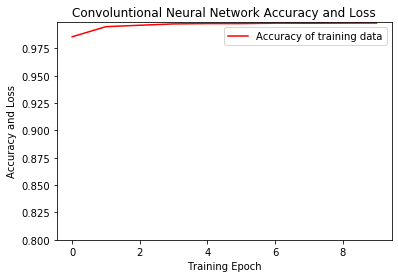

In [623]:
plt.figure(figsize=(6, 4))
plt.plot(model.history.history['acc'], 'r', label='Accuracy of training data')
#plt.plot(model.history.history['loss'], 'b', label='Loss')
# plt.plot(history.history['loss'], 'r--', label='Loss of training data')
# plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
plt.title('Convoluntional Neural Network Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Training Epoch')
plt.ylim(0.8)
plt.legend()
plt.show()

In [624]:
# serialize model to JSON
model_json = model.to_json()
with open("convolutional_neural_network.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("convolutional_neural_network.h5")
print("Saved model to disk")

Saved model to disk


In [678]:
model.save('CNN_model.h5')

In [670]:
from tensorflow.keras.models import model_from_json

json_file = open('convolutional_neural_network.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("convolutional_neural_network.h5")
print("Loaded model from disk")

Loaded model from disk


In [679]:
from tensorflow.keras.models import load_model
model123=load_model('CNN_model.h5')

In [672]:
loaded_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
_, accuracy = loaded_model.evaluate(x_test, y_test_hot, batch_size=32, verbose=0)
accuracy

0.9819341035498221

In [680]:
_, accuracy = model123.evaluate(x_test, y_test_hot, batch_size=32, verbose=0)
accuracy

0.893896993152724

In [667]:
loaded_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_20 (Conv1D)           (None, 98, 192)           12288     
_________________________________________________________________
conv1d_21 (Conv1D)           (None, 96, 256)           147712    
_________________________________________________________________
dropout_10 (Dropout)         (None, 96, 256)           0         
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 48, 256)           0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 12288)             0         
_________________________________________________________________
dense_66 (Dense)             (None, 192)               2359488   
_________________________________________________________________
dense_67 (Dense)             (None, 100)               19300     
__________

In [662]:
_, accuracy = model.evaluate(x_test, y_test_hot, batch_size=32, verbose=0)

In [663]:
accuracy

0.893896993152724

In [668]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_20 (Conv1D)           (None, 98, 192)           12288     
_________________________________________________________________
conv1d_21 (Conv1D)           (None, 96, 256)           147712    
_________________________________________________________________
dropout_10 (Dropout)         (None, 96, 256)           0         
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 48, 256)           0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 12288)             0         
_________________________________________________________________
dense_66 (Dense)             (None, 192)               2359488   
_________________________________________________________________
dense_67 (Dense)             (None, 100)               19300     
__________

In [331]:
def evaluate_model(trainX, trainy, testX, testy, n_filters):
	verbose, epochs, batch_size = 0, 10, 32
	n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
	model = Sequential()
	model.add(Conv1D(filters=n_filters, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
	model.add(Conv1D(filters=n_filters, kernel_size=3, activation='relu'))
	model.add(Dropout(0.5))
	model.add(MaxPooling1D(pool_size=2))
	model.add(Flatten())
	model.add(Dense(100, activation='relu'))
	model.add(Dense(n_outputs, activation='softmax'))
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	# fit network
	model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose)
	# evaluate model
	_, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
	return accuracy
 
# summarize scores
def summarize_results(scores, params):
	print(scores, params)
	# summarize mean and standard deviation
	for i in range(len(scores)):
		m, s = mean(scores[i]), std(scores[i])
		print('Param=%d: %.3f%% (+/-%.3f)' % (params[i], m, s))
	# boxplot of scores
	pyplot.boxplot(scores, labels=params)
	pyplot.savefig('exp_cnn_filters.png')
